In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv',encoding='latin1')

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3345,ham,U're welcome... Caught u using broken english ...,NaN,NaN,NaN
244,ham,U don't remember that old commercial?,NaN,NaN,NaN
2340,ham,I will take care of financial problem.i will h...,NaN,NaN,NaN
1506,spam,Thanks for the Vote. Now sing along with the s...,NaN,NaN,NaN
3863,ham,A pure hearted person can have a wonderful smi...,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
# Major steps Involved
# Data cleaning
# Exploratory Data Analysis (EDA)
# Text preprocessing
# Model Building
# Evaluation
# Improvements
# Website creation
# Deployment

## 1. Data cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


We can see that there are lot of null values in the last three columns and we can delete that columns

In [8]:
# Drop the last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [9]:
df.sample(5)

,v1,v2
1979,ham,Shhhhh nobody is supposed to know!
4742,ham,I am in hospital da. . I will return home in e...
3610,ham,No. I.ll meet you in the library
482,ham,Watching tv lor...
4712,ham,Big brotherÛ÷s really scraped the barrel with...


In [10]:
# Rename the columns
df.rename(columns={'v1':'target','v2': 'text'},inplace=True)
df.sample(5)

,target,text
3512,ham,Staff of placement training in Amrita college.
2275,ham,Is that on the telly? No its Brdget Jones!
4023,ham,Wat time Ì_ wan today?
2174,ham,See? I thought it all through
36,ham,"Oops, I'll let you know when my roommate's done"


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target']=encoder.fit_transform(df['target'])

In [13]:
df.sample(5)

,target,text
1632,0,Hello my little party animal! I just thought I...
2172,0,Yavnt tried yet and never played original either
3806,0,Pls dont restrict her from eating anythin she ...
4775,0,Quite lor. But dun tell him wait he get compla...
4240,0,Detroit. The home of snow. Enjoy it.


In [14]:
# check for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
# check for duplicate values
df.duplicated().sum()

403

In [16]:
# Remove duplicate
df = df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

## 2. EDA

In [19]:
# First we need to check the percentage of spam and ham
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

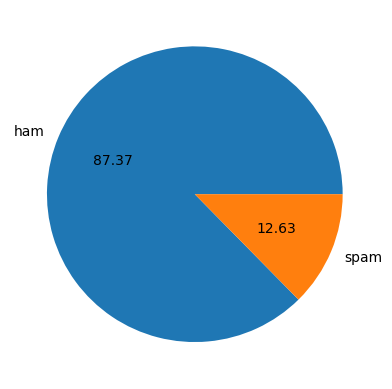

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

From above graph we can coclude tha data is impbalenced

In [21]:
import nltk

In [22]:
df['num_characters'] = df['text'].apply(len)

In [23]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
# fetch the number of words
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [25]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
# similarly fetch the number of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df[['num_characters', 'num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286129,1.961308
std,58.236293,13.226400,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [28]:
df[df['target']==0][['num_characters', 'num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [29]:
df[df['target']==1][['num_characters', 'num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


We can clearly see that there are more numbers of characters, words and sentences in the spam messages compared to the ham messeges. For more understanding we plot these figures.

In [30]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

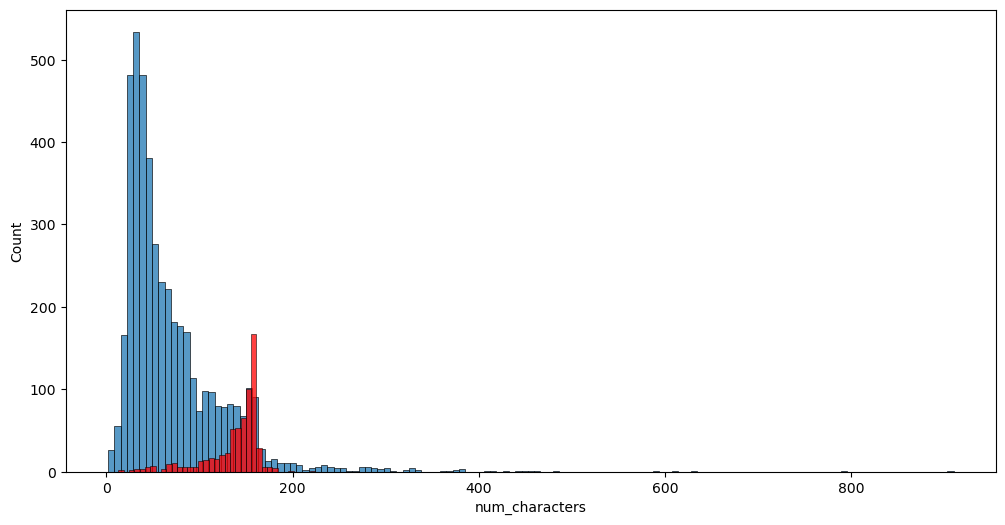

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

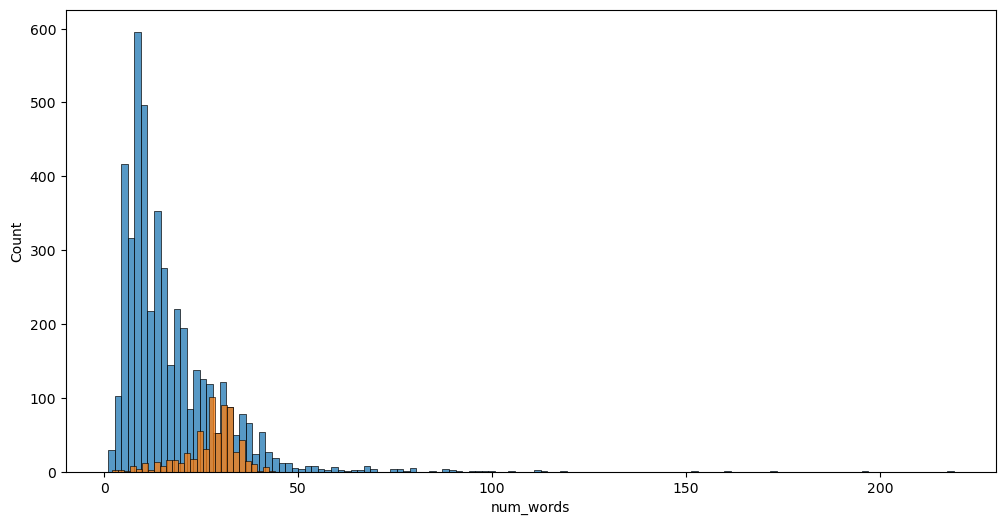

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'])

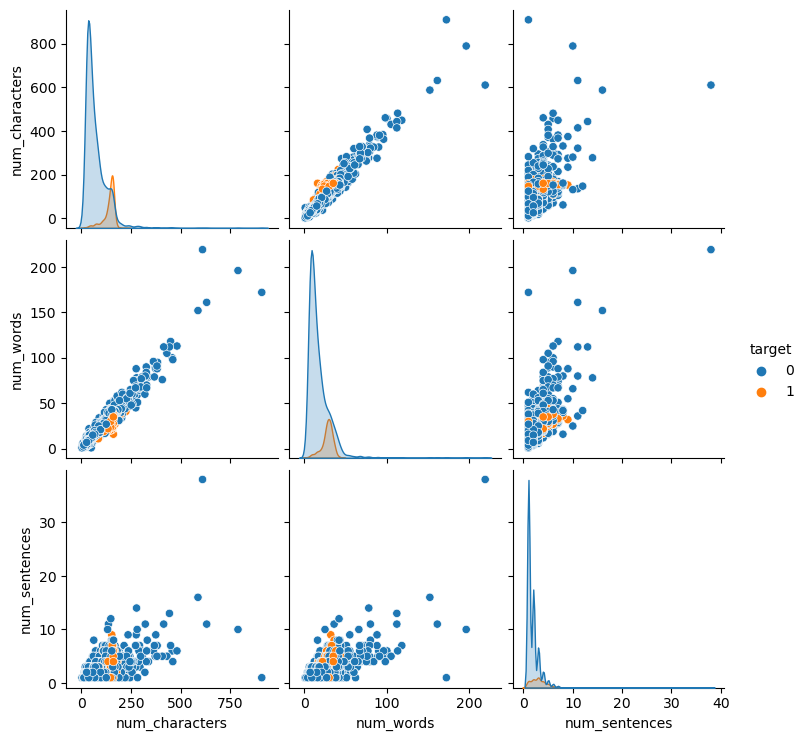

In [33]:
sns.pairplot(df,hue='target')

In [34]:
df.corr()

/tmp/ipykernel_20/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.264198,0.267602
num_characters,0.384717,1.000000,0.965307,0.626118
num_words,0.264198,0.965307,1.000000,0.683561
num_sentences,0.267602,0.626118,0.683561,1.000000


/tmp/ipykernel_20/4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

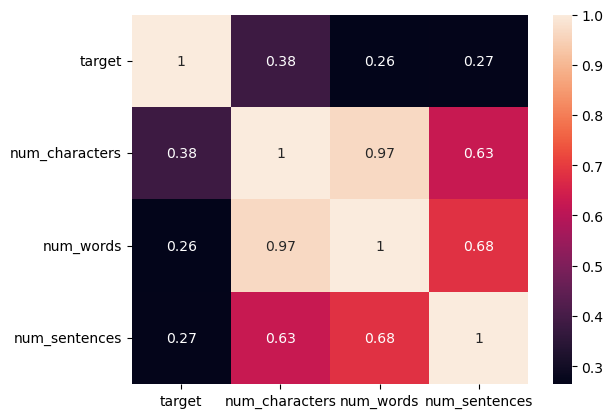

In [35]:
sns.heatmap(df.corr(),annot=True)

Here we can see that there are multicolinearity between the last 3 columns. Hence it is sufficient to keep any one out of these 3 columns. 'num_characters' is the better one compare to other 2.

## 3. Data Preprocessing
- lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Steming

In [36]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

In [37]:
ps= PorterStemmer()

In [38]:
def transform_text(text):
    # Converting all to the lower case
    text = text.lower()
    
    # Tokenizing the word - creating list of all the words, nums and special characters.
    text = nltk.word_tokenize(text)
    
    # Removing special characters
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    # Removing stop words and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text =y[:]
    y.clear()
    
    # Steming
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [39]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [40]:
ms = "I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."
tm = transform_text(ms)
tm

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [41]:
df['transformed_text']=df['text'].apply(transform_text)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [42]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [43]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

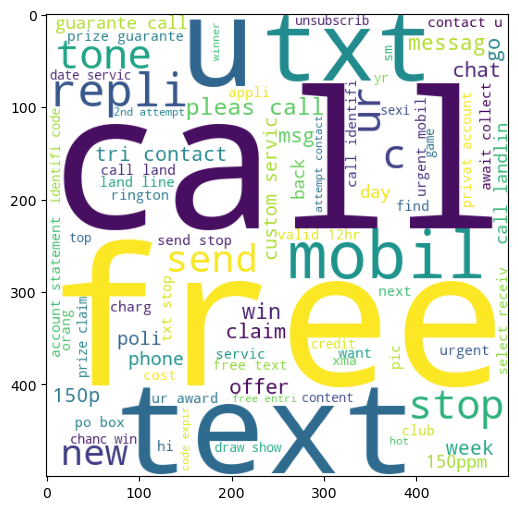

In [44]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [45]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

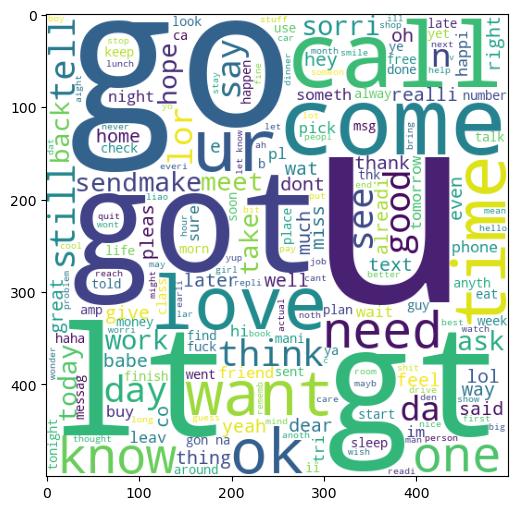

In [46]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [47]:
spam_corpus= []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)

In [48]:
len(spam_corpus)

9883

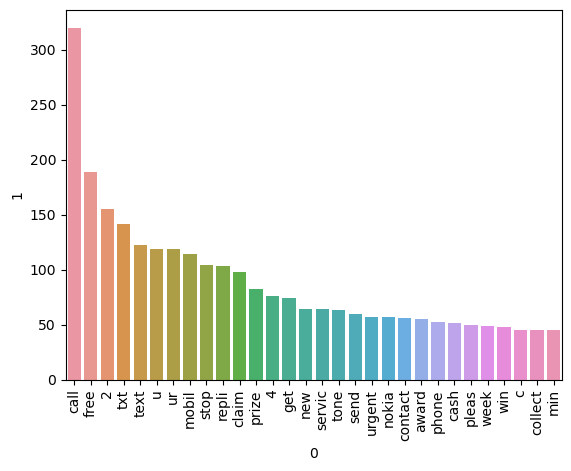

In [49]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [50]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [51]:
len(ham_corpus)

34771

In [52]:
Counter(ham_corpus).most_common(5)

[('u', 871), ('go', 401), ('get', 349), ('gt', 288), ('lt', 287)]

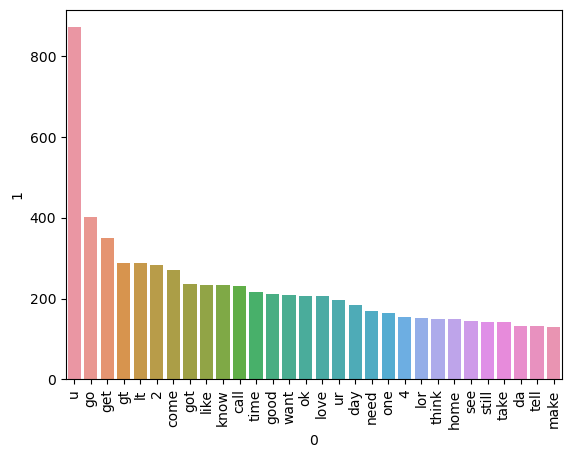

In [53]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

In [54]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
#tfidf = TfidfVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [55]:
#X = cv.fit_transform(df['transformed_text']).toarray()
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [56]:
X.shape

(5169, 3000)

In [57]:
y = df['target'].values

In [58]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [61]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [62]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [63]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(f"Accuracy : {accuracy_score(y_test,y_pred1):.3f}")
print(confusion_matrix(y_test,y_pred1))
print(f"Precision : {precision_score(y_test,y_pred1) : .3f}")

Accuracy : 0.868
[[785 111]
 [ 26 112]]
Precision :  0.502


In [64]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(f"Accuracy : {accuracy_score(y_test,y_pred2):.3f}")
print(confusion_matrix(y_test,y_pred2))
print(f"Precision : {precision_score(y_test,y_pred2):.3f}")

Accuracy : 0.973
[[896   0]
 [ 28 110]]
Precision : 1.000


In [65]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(f"Accuracy : {accuracy_score(y_test,y_pred3):.3f}")
print(confusion_matrix(y_test,y_pred3))
print(f"Precision : {precision_score(y_test,y_pred3):.3f}")

Accuracy : 0.982
[[895   1]
 [ 18 120]]
Precision : 0.992


Result is better using tfidf feature extraction method and multinomial NB method.

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [67]:
lr = LogisticRegression(solver='liblinear',penalty='l1')
svc = SVC(kernel='sigmoid',gamma=1.0)
mnb = MultinomialNB()
dt = DecisionTreeClassifier(max_depth=5)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
ada = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [68]:
clfs = {
    'LR':lr,
    'SVC':svc,
    'MNB':mnb,
    'DT':dt,
    'KN':knc,
    'RF':rfc,
    'AdaBoost':ada,
    'BAG':bc,
    'ETC':etc,
    'GBDT':gbc,
    'XGB':xgb
}

In [69]:
def train_classifier(clf,X_train,X_test,y_train,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [70]:
train_classifier(svc,X_train,X_test,y_train,y_test)

(0.9748549323017408, 0.9666666666666667)

In [71]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,X_test,y_train,y_test)
    print(f"For {name}")
    print(f"Accuracy :{current_accuracy:.3f}")
    print(f"Precision : {current_precision:.3f}")
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For LR
Accuracy :0.957
Precision : 0.952
For SVC
Accuracy :0.975
Precision : 0.967
For MNB
Accuracy :0.973
Precision : 1.000
For DT
Accuracy :0.931
Precision : 0.853
For KN
Accuracy :0.905
Precision : 1.000
For RF
Accuracy :0.972
Precision : 0.974
For AdaBoost
Accuracy :0.964
Precision : 0.932
For BAG
Accuracy :0.955
Precision : 0.853
For ETC
Accuracy :0.978
Precision : 0.983
For GBDT
Accuracy :0.949
Precision : 0.929
For XGB
Accuracy :0.969
Precision : 0.942


In [72]:
#performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores, 'Precision':precision_scores}).sort_values("Precision",ascending=False)
#temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores, 'Precision_max_ft_3000':precision_scores}).sort_values("Precision_max_ft_3000",ascending=False)
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores, 'Precision_max_ft_3000':precision_scores}).sort_values("Precision_max_ft_3000",ascending=False)
performance_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
2,MNB,0.972921,1.000000
4,KN,0.905222,1.000000
8,ETC,0.977756,0.983193
5,RF,0.971954,0.973913
1,SVC,0.974855,0.966667
0,LR,0.957447,0.951923
10,XGB,0.969052,0.941667
6,AdaBoost,0.964217,0.931624
9,GBDT,0.948743,0.929293
7,BAG,0.954545,0.852713


In [73]:
#new_df = performance_df.merge(temp_df,on="Algorithm")
#new_df

In [74]:
performance_df1 = pd.melt(performance_df,id_vars="Algorithm")

In [75]:
performance_df1

,Algorithm,variable,value
0,MNB,Accuracy_max_ft_3000,0.972921
1,KN,Accuracy_max_ft_3000,0.905222
2,ETC,Accuracy_max_ft_3000,0.977756
3,RF,Accuracy_max_ft_3000,0.971954
4,SVC,Accuracy_max_ft_3000,0.974855
5,LR,Accuracy_max_ft_3000,0.957447
6,XGB,Accuracy_max_ft_3000,0.969052
7,AdaBoost,Accuracy_max_ft_3000,0.964217
8,GBDT,Accuracy_max_ft_3000,0.948743
9,BAG,Accuracy_max_ft_3000,0.954545


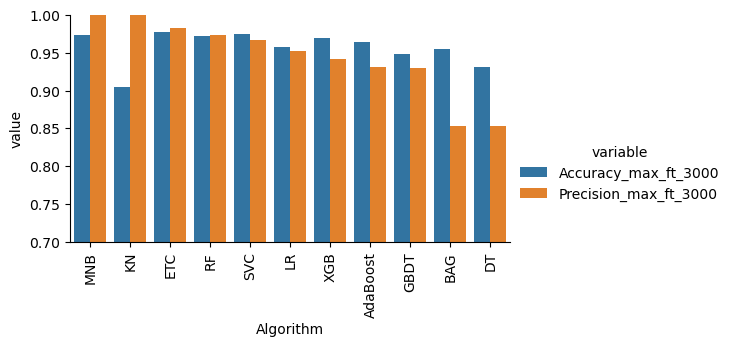

In [76]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=3,aspect=1.8)
plt.ylim(0.7,1.0)
plt.xticks(rotation='vertical')
plt.show()

## 5. Model Improvement

Include and set the maxfeatures in tfidf vectorizer. (found 3000 is better value after conducting some experiments)

In [77]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [78]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [79]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [80]:
y = df['target'].values

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [83]:
def train_classifier(clf,X_train,X_test,y_train,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy, precision

In [84]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,X_test,y_train,y_test)
    print(f"For {name}")
    print(f"Accuracy :{current_accuracy:.3f}")
    print(f"Precision : {current_precision:.3f}")
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For LR
Accuracy :0.967
Precision : 0.964
For SVC
Accuracy :0.971
Precision : 0.935
For MNB
Accuracy :0.979
Precision : 0.939
For DT
Accuracy :0.934
Precision : 0.850
For KN
Accuracy :0.905
Precision : 1.000
For RF
Accuracy :0.972
Precision : 0.974
For AdaBoost
Accuracy :0.964
Precision : 0.932
For BAG
Accuracy :0.955
Precision : 0.853
For ETC
Accuracy :0.978
Precision : 0.983
For GBDT
Accuracy :0.949
Precision : 0.929
For XGB
Accuracy :0.969
Precision : 0.942


In [85]:
temp_df1 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_after_scaling':accuracy_scores,'Precision_after_scaling':precision_scores}).sort_values(by='Precision_after_scaling',ascending=False)

In [86]:
new_df_scaled = performance_df.merge(temp_df1, on='Algorithm')
new_df_scaled

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_after_scaling,Precision_after_scaling
0,MNB,0.972921,1.000000,0.978723,0.939394
1,KN,0.905222,1.000000,0.905222,1.000000
2,ETC,0.977756,0.983193,0.977756,0.983193
3,RF,0.971954,0.973913,0.971954,0.973913
4,SVC,0.974855,0.966667,0.970986,0.935484
5,LR,0.957447,0.951923,0.967118,0.964286
6,XGB,0.969052,0.941667,0.969052,0.941667
7,AdaBoost,0.964217,0.931624,0.964217,0.931624
8,GBDT,0.948743,0.929293,0.948743,0.929293
9,BAG,0.954545,0.852713,0.954545,0.852713


Scaling did not helped to improve the results.

we can try to improve the model using stacking or voting etc.

Since precisioin is very important for this case we will proceed with th MNB method.

In [87]:
#import pickle
#pickle.dump(tfidf,open('vectorizer.pkl','wb'))
#pickle.dump(mnb,open('model.pkl','wb'))